
# Analysis of  Investigate a Dataset No-show appointments 

## Table of Contents
<ul>
<li><a href="#abs">Abstract</a></li>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#dataset">Dataset Description</a></li>
<li><a href="#issues">Issues in Dataset</a></li>
<li><a href="#solvissues">Solving Issues</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#weekday">Add New Column of Week Dayes from convert AppointmentDay column</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Q1">Is day of week effected to no show of patients ?</a></li>
<li><a href="#Q2">Which of parameters (columns) effected on patients no show ?</a></li>
<li><a href="#Q3">What is the most common parameter effected on patients no show ?</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='abs'></a>
## Abstract
This Jupyter notebook, I proposed an investigation method to analysis dataset containing more than 110k patients in Brazil

<a id='intro'></a>
## Introduction

In Data Analysis era, There is most important issue to analysis and investigate every data 
and information of overall things around us.
So, in This Jupyter notebook, I proposed an investigation method to analysis dataset containing more than 110k patients in Brazil using panada, numpy and matplotlib to investigate this dataset and understand what meaning of dataset issues.

In [45]:
### import statements for all of the packages 
import time
import pandas as pd      ### pandas package
import numpy as np       ### Numpy package
from IPython.display import display
import matplotlib.pyplot as plt

###   to display drawing in note book
%matplotlib inline       




<a id='wrangling'></a>
## Data Wrangling.

### General Properties

In [46]:
# Load your data and print out a few lines. reading the dataset
data_file = 'noshowappointments.csv' 
df = pd.read_csv(data_file) 

display(df.head())        ### using display
df.shape                  ### show rows and columns


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


(110527, 14)

<a id='dataset'></a>
## Dataset Description
* This dataset contain 14 columns and 110527 rows
* 'No-show' if "Yes" the patient didn't attend the apointment and if "No" the patient attend.
* 'ScheduledDay' includes what day the patient set up their appointment.
* 'SMS_received' indicates messages sent to the patient.
* 'Neighborhood' includes the hospital location.
* 'Scholarship' indicates the patient have or not a health insurance
* the other columns are clear




In [47]:
df.info()    # display important info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* Data Type of PatientId and AppointmentID columns must be string
* Data Type of ScheduledDay and	AppointmentDay columns must be datetime
* Data Type of No-show column can be bool data type to save memory storage but not necessary for analysing
* There are NOT missing values
* Memory Storage is 11.8+ MB

### Missing Values checking

In [48]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

* There are NOT missing values

### Duplicated Data checking

In [49]:
df.duplicated().sum()

0

* There is NOT duplicated

In [50]:
df.describe()   ### display mean max min std .... of dataset

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### There is ONE value in Age column out of range

* in Age column , there is minimum value = -1 , it is out of range and not logic
* in Age column , the maximum age of patient is 115 years old
* in Age column , the mean of patients age is 37 years old

<a id='issues'></a>
## Issues in Dataset
* Data Type of PatientId and AppointmentID columns must be string
* Data Type of ScheduledDay and	AppointmentDay columns must be datetime
* Data Type of No-show column can be bool data type to save memory storage but not nesscary
* There is an Age value out of range


<a id='solvissues'></a>
## Solving Issues

In [51]:
df['PatientId']= df['PatientId'].map(str)
df['AppointmentID']= df['AppointmentID'].map(str)
df.info()      # display important info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  object
 1   AppointmentID   110527 non-null  object
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


In [52]:
### solving issues of ScheduledDay and AppointmentDay columns must be datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
###   check changes
df.info()     # display important info about dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  object             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

<a id='clean'></a>
## Data Cleaning

In [53]:
### Remove the age value that out of range
df = df[df.Age >= 0]   ### Drop the value less than zero
df.shape               ### show rows and columns

(110526, 14)

the rows become 110526 insteed 110527 ,the age value that out of range is dropped

<a id='weekday'></a>
### Add New Column of Week Dayes from convert AppointmentDay column

In [54]:
df['day_of_week'] = df['AppointmentDay'].dt.day_name()  # to save the day by letter name
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,day_of_week
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


#### These columns are not important in analysis
* 'PatientId'
* 'AppointmentID'	
* 'ScheduledDay'	
* 'AppointmentDay' is converted to 'day_of_week'
* so will be dropped

In [55]:
### Remove columns that not necessary for analysing
df.drop(columns=['PatientId'],axis = 1, inplace=True)
df.drop(columns=["AppointmentID"], axis = 1,inplace=True)
df.drop(columns=["ScheduledDay"], axis = 1,inplace=True)
df.drop(columns=["AppointmentDay"],axis = 1, inplace=True)

df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,day_of_week
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [56]:
df.shape   ### check changes

(110526, 11)

##### The New Dataset after cleaning is 110526 rows and 11 columns

<a id='eda'></a>
## Exploratory Data Analysis

* rename No-Show column to avoid error

In [57]:
df = df.rename(columns={'No-show' : 'NoSHOW'}) ### rename No-show to avoid error
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoSHOW,day_of_week
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [58]:
df['NoSHOW'].value_counts()

No     88207
Yes    22319
Name: NoSHOW, dtype: int64

* the patients has showed are 4 times of no showed

In [59]:
SHOW = df.NoSHOW == 'No'
df[SHOW].count()

Gender           88207
Age              88207
Neighbourhood    88207
Scholarship      88207
Hipertension     88207
Diabetes         88207
Alcoholism       88207
Handcap          88207
SMS_received     88207
NoSHOW           88207
day_of_week      88207
dtype: int64

In [60]:
NoSHOW = df.NoSHOW == 'Yes'
df[NoSHOW].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hipertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
NoSHOW           22319
day_of_week      22319
dtype: int64

<a id='Q1'></a>
#### Is day of week effected to no show of patients ?

Text(0, 0.5, 'Number of Patients')

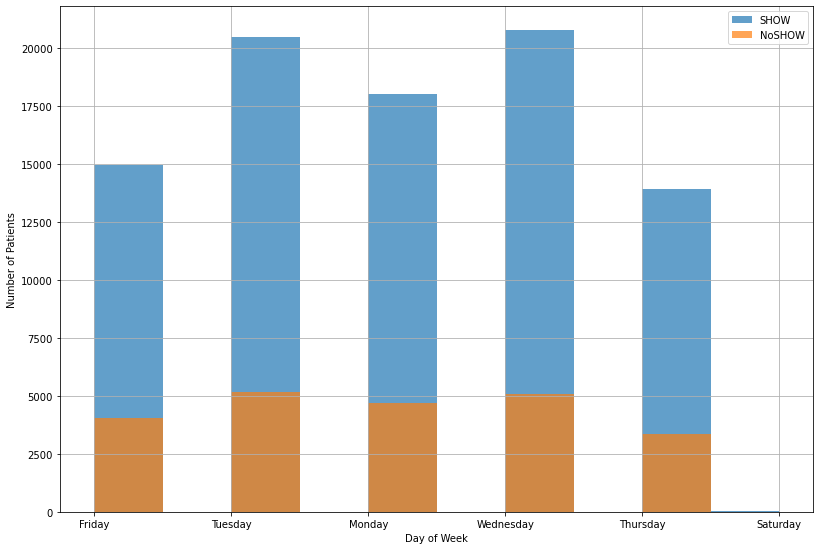

In [61]:
plt.figure(figsize=[13.50, 9.30])
df.day_of_week[SHOW].hist(alpha = 0.7, label = 'SHOW')
df.day_of_week[NoSHOW].hist(alpha = 0.7, label = 'NoSHOW')
plt.legend()
plt.xlabel('Day of Week')
plt.ylabel('Number of Patients')

* we see here that Wednesday and Tuesday are more days which high patients showed

<a id='Q2'></a>
### Which of parameters (columns) effected on patients no show ?

Text(0, 0.5, 'Number of Patients')

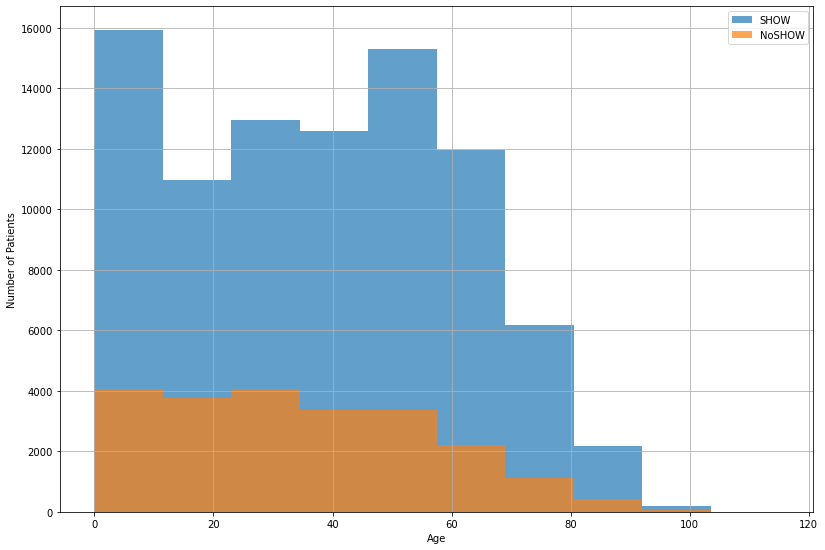

In [62]:
plt.figure(figsize=[13.50, 9.30])
df.Age[SHOW].hist(alpha = 0.7, label = 'SHOW')
df.Age[NoSHOW].hist(alpha = 0.7, label = 'NoSHOW')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Number of Patients')

* we can see here, that patients have 0 : 10 age showed more than other ages
* follow them patients have 44 : 57 age showed
* the oldest age more than 80 less showed

Text(0, 0.5, 'Number of Patients')

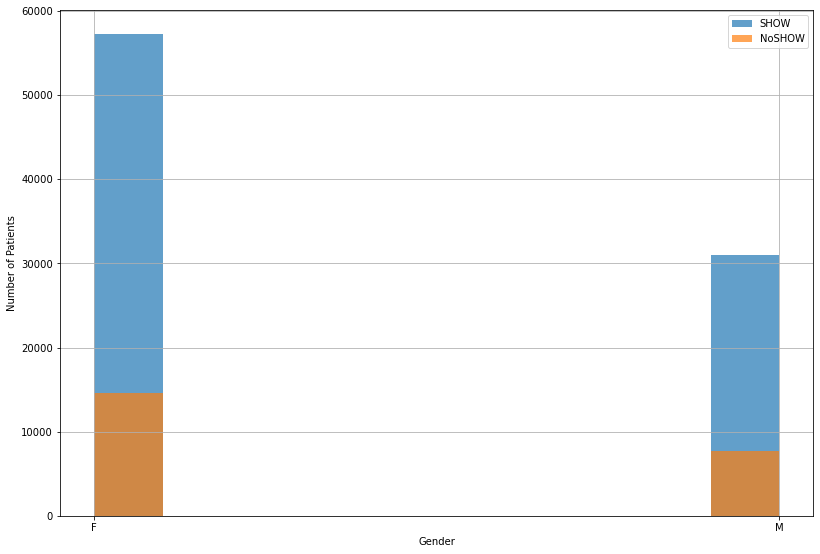

In [63]:
plt.figure(figsize=[13.50, 9.30])
df.Gender[SHOW].hist(alpha = 0.7, label = 'SHOW')
df.Gender[NoSHOW].hist(alpha = 0.7, label = 'NoSHOW')
plt.legend()
plt.xlabel('Gender')
plt.ylabel('Number of Patients')

Male ande female who noshow = 1/4 that show

Text(0, 0.5, 'Number of Patients')

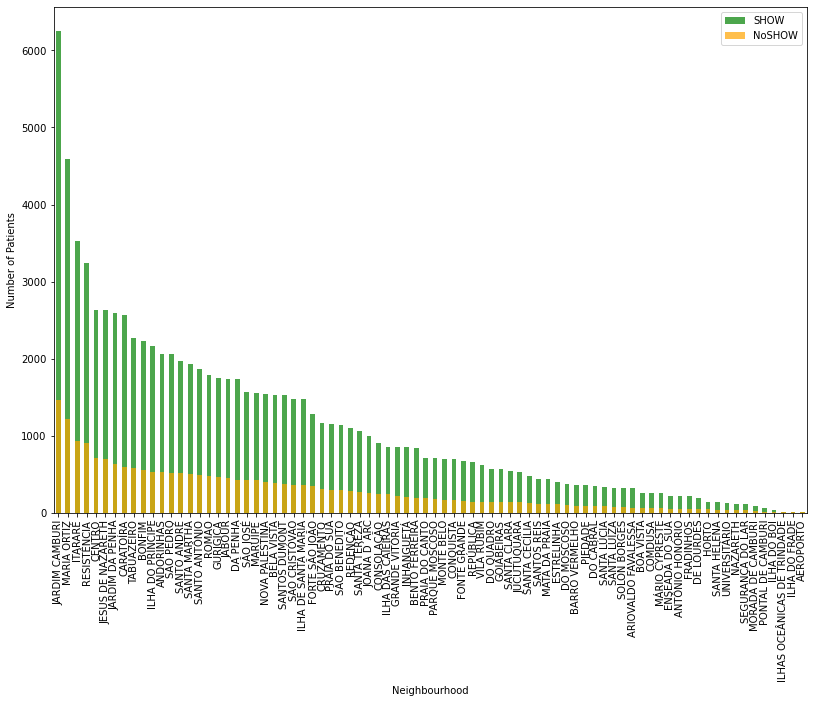

In [64]:
plt.figure(figsize=[13.50, 9.30])
df.Neighbourhood[SHOW].value_counts().plot(kind='bar',color='green',alpha = 0.7, label = 'SHOW')
df.Neighbourhood[NoSHOW].value_counts().plot(kind='bar',color='orange',alpha = 0.7, label = 'NoSHOW')
plt.legend()
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Patients')

* Neighbourhood is high effected
* there are high two region JARDIM CAMBURI and MARIA ORTIZ

Text(0, 0.5, 'Number of Patients')

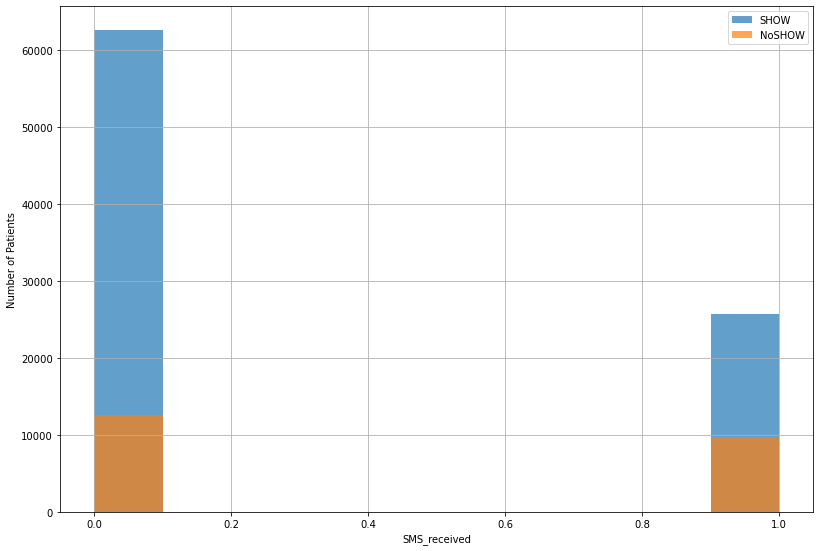

In [65]:
plt.figure(figsize=[13.50, 9.30])
df.SMS_received[SHOW].hist(alpha = 0.7, label = 'SHOW')
df.SMS_received[NoSHOW].hist(alpha = 0.7, label = 'NoSHOW')
plt.legend()
plt.xlabel('SMS_received')
plt.ylabel('Number of Patients')

More patients showed without received SMS than patient no show ,it is not logic

Text(0, 0.5, 'Number of Patients')

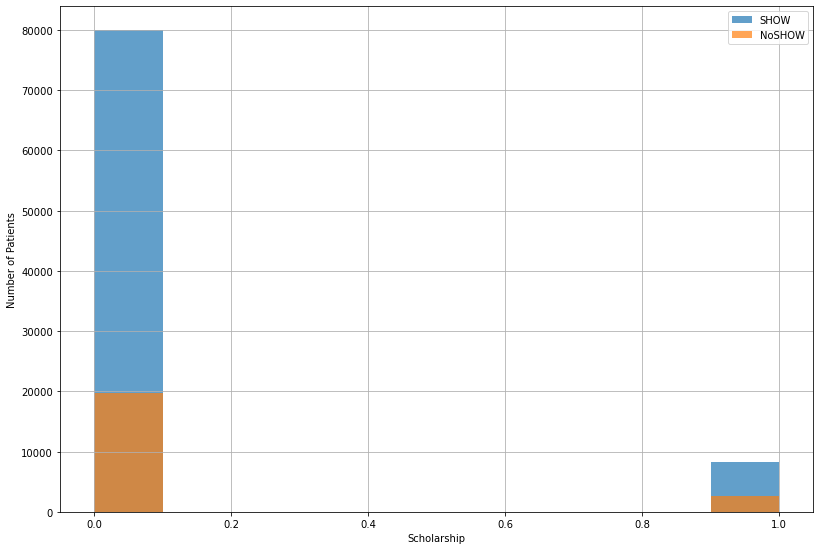

In [66]:
plt.figure(figsize=[13.50, 9.30])
df.Scholarship[SHOW].hist(alpha = 0.7, label = 'SHOW')
df.Scholarship[NoSHOW].hist(alpha = 0.7, label = 'NoSHOW')
plt.legend()
plt.xlabel('Scholarship')
plt.ylabel('Number of Patients')

Scholarship is Not effect

Text(0, 0.5, 'Number of Patients')

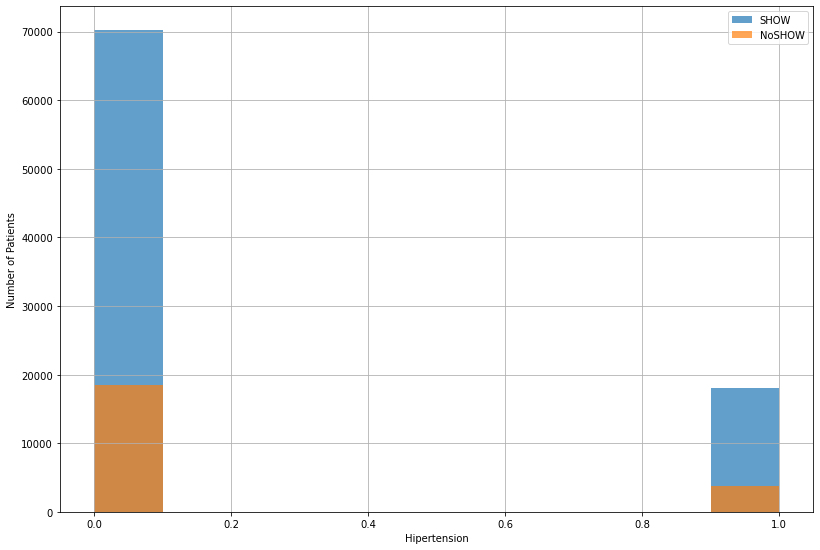

In [67]:
plt.figure(figsize=[13.50, 9.30])
df.Hipertension[SHOW].hist(alpha = 0.7, label = 'SHOW')
df.Hipertension[NoSHOW].hist(alpha = 0.7, label = 'NoSHOW')
plt.legend()
plt.xlabel('Hipertension')
plt.ylabel('Number of Patients')

Hipertension is Not effect

Text(0, 0.5, 'Number of Patients')

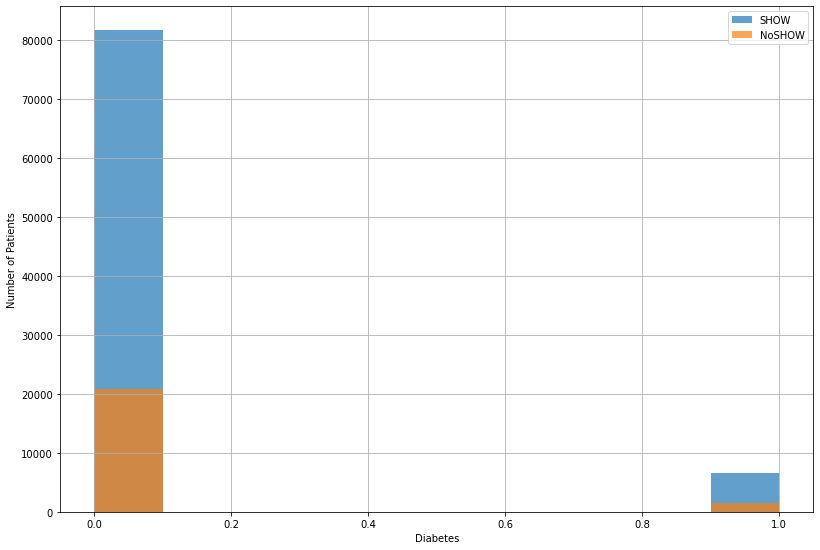

In [68]:
plt.figure(figsize=[13.50, 9.30])
df.Diabetes[SHOW].hist(alpha = 0.7, label = 'SHOW')
df.Diabetes[NoSHOW].hist(alpha = 0.7, label = 'NoSHOW')
plt.legend()
plt.xlabel('Diabetes')
plt.ylabel('Number of Patients')

Diabetes is Not effect

Text(0, 0.5, 'Number of Patients')

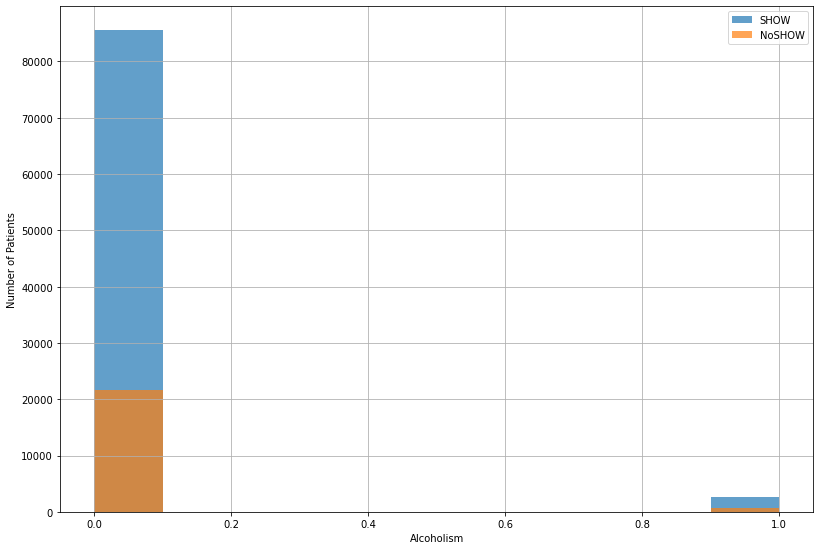

In [69]:
plt.figure(figsize=[13.50, 9.30])
df.Alcoholism[SHOW].hist(alpha = 0.7, label = 'SHOW')
df.Alcoholism[NoSHOW].hist(alpha = 0.7, label = 'NoSHOW')
plt.legend()
plt.xlabel('Alcoholism')
plt.ylabel('Number of Patients')

Alcoholism is Not effect

Text(0, 0.5, 'Number of Patients')

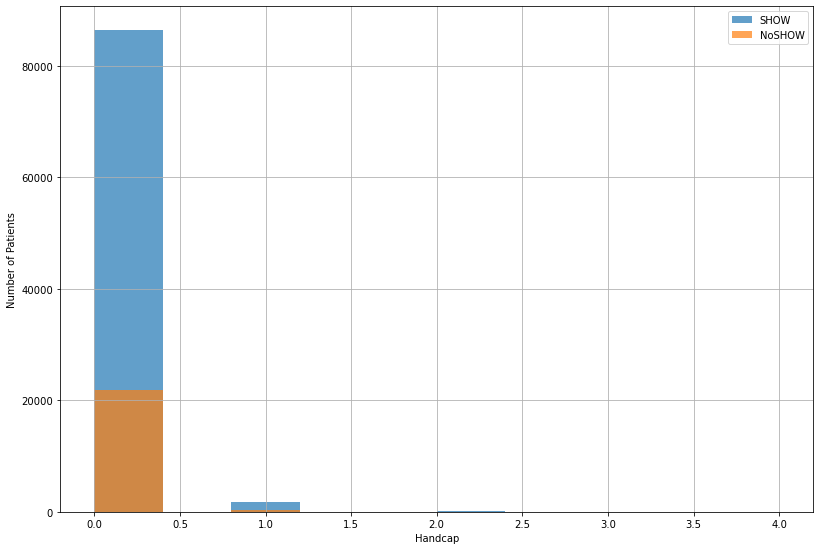

In [70]:
plt.figure(figsize=[13.50, 9.30])
df.Handcap[SHOW].hist(alpha = 0.7, label = 'SHOW')
df.Handcap[NoSHOW].hist(alpha = 0.7, label = 'NoSHOW')
plt.legend()
plt.xlabel('Handcap')
plt.ylabel('Number of Patients')

Handcap is Not effect

<a id='Q3'></a>
### What is the most common parameter effected on patients no show ?

* the Neighbourhood is high effected on patients no show

<a id='conclusions'></a>
## Conclusions

* this dataset has no missing values and no duplicated
there is one value in age column is out of range
* ther are columns data type ScheduledDay and AppointmentDay to date time
* data cleaning to drop out of range value and droped not important colimns, 
The New Dataset after cleaning is 110526 rows and 11 columns
* the Neighbourhood is high effected on patients no show
* More patients showed without received SMS than patient no show ,it is not logic
